<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/capstone/ideas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random

points = []
for i in range(1000):
  for j in range(1000):
    points.append((i, j))

random.shuffle(points)

with open("puntosentrega.csv", 'w') as f:
  for i in points[:5000]:
    f.write(str(i[0]) + "," + str(i[1]) + "\n")

with open("almacenes.csv", 'w') as f:
  for i in points[5000:5100]:
    f.write(str(i[0]) + "," + str(i[1]) + "\n")

In [6]:
import numpy as np
import pandas as pd

In [10]:
pentrega = pd.read_csv("puntosentrega.csv", header=None).to_numpy()
almacenes = pd.read_csv("almacenes.csv", header=None).to_numpy()

print(pentrega.shape)
print(almacenes.shape)

(5000, 2)
(100, 2)


In [11]:
import matplotlib.pyplot as plt

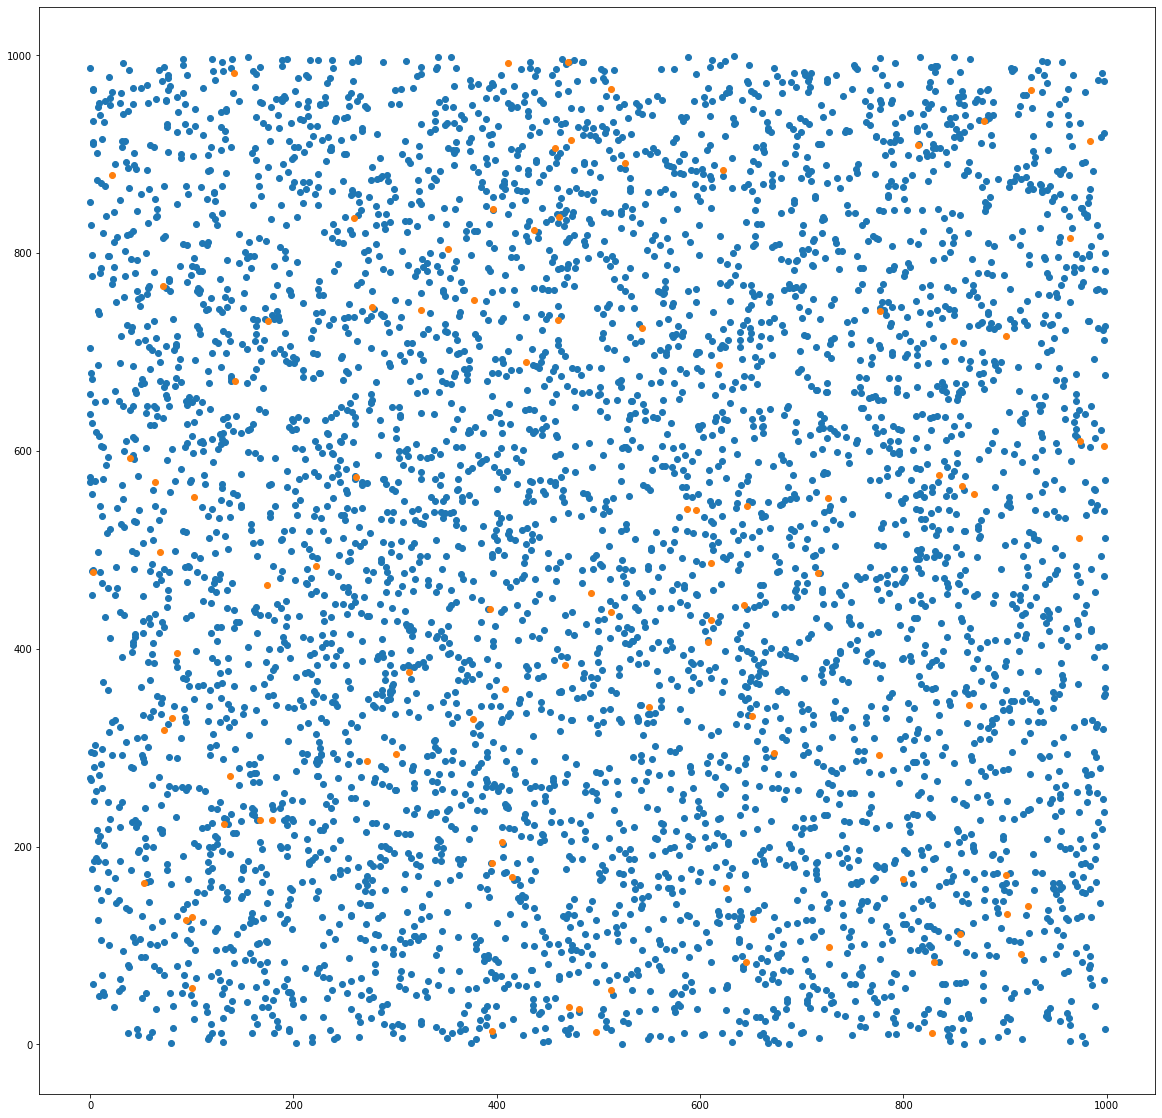

In [16]:
plt.subplots(figsize=(20, 20))

plt.scatter(pentrega[:, 0], pentrega[:, 1])
plt.scatter(almacenes[:, 0], almacenes[:, 1])

In [17]:
def dist(a, b):
  xa, ya = a
  xb, yb = b

  return abs(xa - xb) + abs(ya - yb)

In [25]:
groups = [0]*5000

for i, a in enumerate(pentrega):
  group = 0
  mindist = dist(a, almacenes[0])
  for j, b in enumerate(almacenes):
    d = dist(a, b)
    if d < mindist:
      mindist = d
      group = j
  groups[i] = group

In [29]:
counts = [0]*100

for g in groups:
  counts[g] += 1

print(groups[:20])


[90, 38, 89, 62, 6, 86, 96, 5, 88, 40, 43, 59, 41, 86, 49, 7, 73, 18, 87, 62]


In [30]:
pentrega2 = np.c_[pentrega, groups]
print(pentrega2[:10])

[[699 876  90]
 [907 984  38]
 [167 508  89]
 [346 115  62]
 [ 71 125   6]
 [719 500  86]
 [457 568  96]
 [340 715   5]
 [118 192  88]
 [845 540  40]]


In [35]:
dfpentrega = pd.DataFrame(pentrega2)
dfpentrega.head()

,0,1,2
0,699,876,90
1,907,984,38
2,167,508,89
3,346,115,62
4,71,125,6


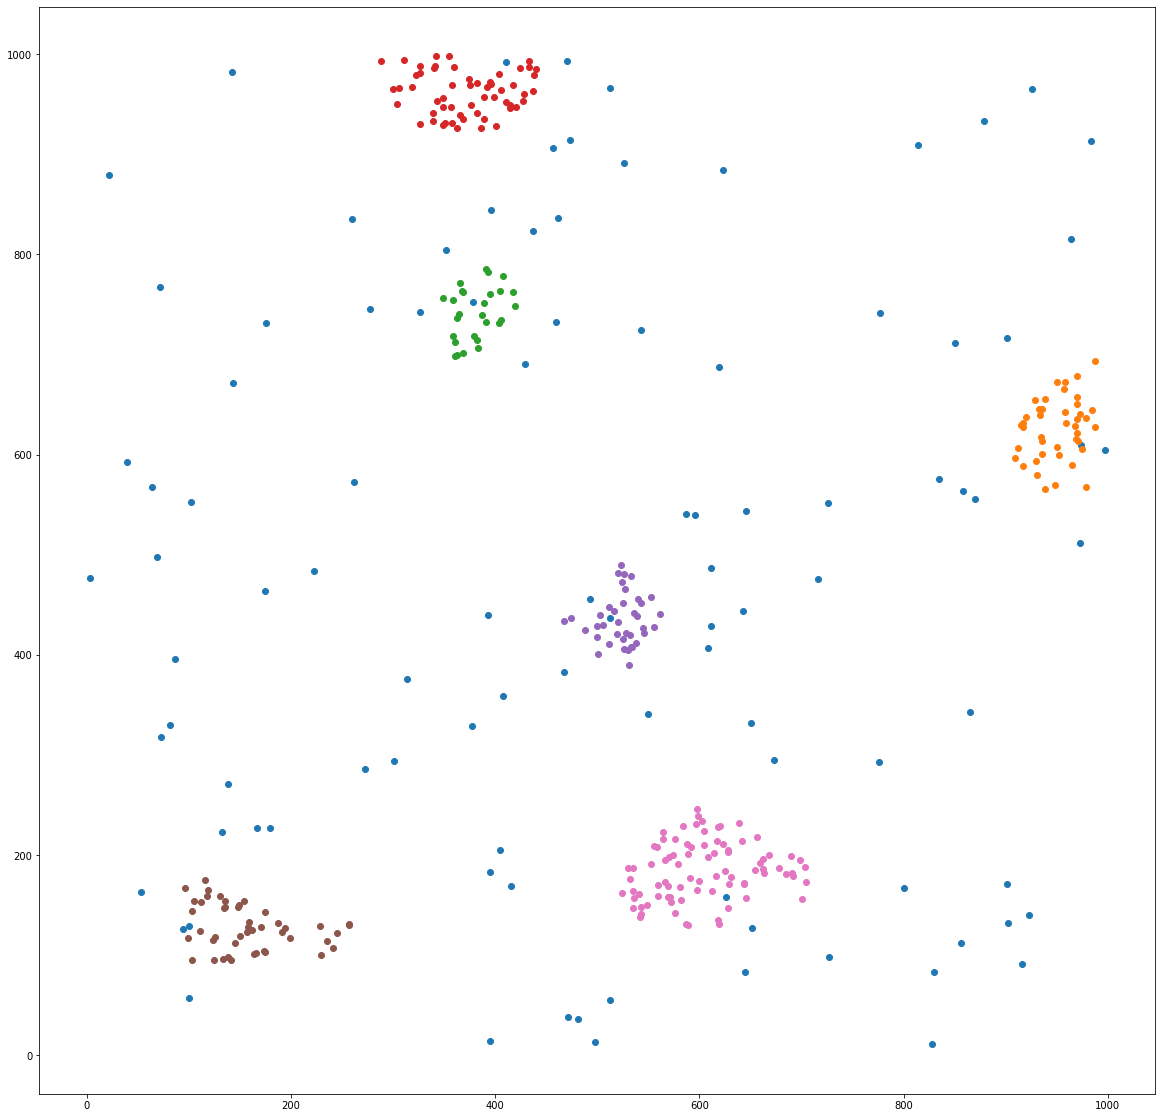

In [40]:
plt.subplots(figsize=(20, 20))

show = [1, 10, 30, 50, 80, 99]

plt.scatter(almacenes[:, 0], almacenes[:, 1])
for alm in show:
  dftemp = dfpentrega[dfpentrega[2] == alm]
  plt.scatter(dftemp[0], dftemp[1])